### Data

https://www.kaggle.com/sdolezel/black-friday


### Introduction:
A retail company wants to understand and interpret their customers' purchasing behavior in relation to various products from various categories for the Black Friday sale. The company has access to customer purchase summaries, which include customer demographics, product information, and total purchase amount for selected high volume products sold during the Black Friday period last year. The goal is to create a model that predicts purchasing capacity in relation to various products, which will aid them in customizing deals and discounts for customers against various products, as well as understanding which areas generate the most sales during Black Friday.

### Data Description

1. User Id: Not Unique, maps person to the particular purchase
2. Product Id: Not Unique, tells how many purchases are made for a product
3. Gender: Have only two variables: F M
4. Age: It is divided into 7 ranges, Here Age is Categorical Variable
5. Occupation: There are 21 different occupation ranging from 0-21
6. City Category: Cities in which customers have lived is categorized into three categories: A, B, C
7. Year.. : People have lived in the current city for 0-5 years. Here 5 could mean at least 5 years
8. Marital Status: People have their marriage status marked as either 0 or 1
9. Product Category 1: Ranges form 1-18
10. Product Category 2: Ranges form 2-18
11. Product Category 3: Ranges form 3-18
12. Purchase: It is the amount people spent in $ for purchases. Not unique.


In [1]:
!pip install pymongo

### Importing the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
test = pd.read_csv("test.csv")

In [4]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


### Retrieving data information

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


### Retrieving columns

In [6]:
test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [7]:
test.shape

(233599, 11)

### Check for Null values

In [8]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [9]:
train = pd.read_csv("train.csv")

In [10]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [12]:
train.shape

(550068, 12)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [14]:
train.shape

(550068, 12)

In [15]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [16]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [17]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

### Visualizing data  types

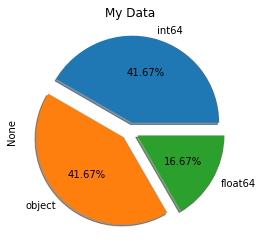

In [18]:
train.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('My Data');

- Most of the columns are integer and object data types 

In [19]:
train["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [20]:
train["Product_Category_2"].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [21]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

### Filling missing values using mean

In [22]:
Pdct_Cat_2_mean = int(train['Product_Category_2'].mean())

In [23]:
train['Product_Category_2']=train['Product_Category_2'].fillna(Pdct_Cat_2_mean).astype(int)

In [24]:
train["Product_Category_2"].isnull().sum()

0

In [25]:
train["Product_Category_3"].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [26]:
Pdct_Cat_3_mean = int(train['Product_Category_3'].mean())

In [27]:
train['Product_Category_3']=train['Product_Category_3'].fillna(Pdct_Cat_3_mean).astype(int)

In [28]:
train['Product_Category_3'].isnull().sum()

0

In [29]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [30]:
train.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object

### Converting data types to required format

In [31]:
train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [32]:
train["Stay_In_Current_City_Years"]=train["Stay_In_Current_City_Years"].str.replace('+',"")

In [33]:
train['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [34]:
train["Stay_In_Current_City_Years"] = train["Stay_In_Current_City_Years"].astype(int)

In [35]:
train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

### Replacing city category values with 1,2,3

In [36]:
train["City_Category"]=train["City_Category"].str.replace('A',"1")
train["City_Category"]=train["City_Category"].str.replace('B',"2")
train["City_Category"]=train["City_Category"].str.replace('C',"3")

In [37]:
train['City_Category'].unique()

array(['1', '3', '2'], dtype=object)

In [38]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,1,2,0,3,9,12,8370
1,1000001,P00248942,F,0-17,10,1,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,1,2,0,12,9,12,1422
3,1000001,P00085442,F,0-17,10,1,2,0,12,14,12,1057
4,1000002,P00285442,M,55+,16,3,4,0,8,9,12,7969


### Converting city category to int

In [39]:
train["City_Category"]= train["City_Category"].astype(int)

In [40]:
train.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                  int64
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object

In [41]:
train["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

### Converting Age into Range

In [42]:
train["Age"] =train["Age"].map({
    '0-17': 1,
    '18-25': 2,
    '26-35': 3,
    '36-45' : 4,
    '46-50' : 5,
    '51-55' : 6,
    '55+' : 7     
})

In [43]:
train["Age"].unique()

array([1, 7, 3, 5, 6, 4, 2])

In [44]:
train["Age"]= train["Age"].astype(int)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  int64 
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  int64 
 6   Stay_In_Current_City_Years  550068 non-null  int64 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  int64 
 10  Product_Category_3          550068 non-null  int64 
 11  Purchase                    550068 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 50.4+ MB


### Changing train dataframe to "Final_Sales_Data"

In [46]:
Final_Sales_Data = train

In [47]:
Final_Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  int64 
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  int64 
 6   Stay_In_Current_City_Years  550068 non-null  int64 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  int64 
 10  Product_Category_3          550068 non-null  int64 
 11  Purchase                    550068 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 50.4+ MB


In [48]:
Final_Sales_Data["Purchase"].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613])

In [49]:
Final_Sales_Data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### Calculating average cost of a product and average buying power of users

In [50]:
Final_Sales_Data['Average_Cost'] = Final_Sales_Data.groupby(['Product_ID'])['Purchase'].transform('mean')
Final_Sales_Data['Buying_Power'] =  Final_Sales_Data.groupby(['User_ID'])['Purchase'].transform('mean')

product_price = Final_Sales_Data[['Average_Cost','Product_ID']].drop_duplicates()
average_cost = product_price['Average_Cost'].mean()
print("Average Cost of Products is ", average_cost)

user_buying_power =  Final_Sales_Data[['Buying_Power','User_ID']].drop_duplicates()
buying_power = user_buying_power['Buying_Power'].mean()
print("Average Buying Power of users is ", buying_power)

Average Cost of Products is  7874.916376628897
Average Buying Power of users is  9568.839913558928


In [51]:
Final_Sales_Data.describe()

,User_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Average_Cost,Buying_Power
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,3.496430,8.076707,2.042640,1.858418,0.409653,5.404270,9.576434,12.202660,9263.968713,9263.968713,9263.968713
std,1.727592e+03,1.353632,6.522660,0.760211,1.289443,0.491770,3.936211,4.226025,2.292502,5023.065394,4267.891837,1619.510567
min,1.000001e+06,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,36.675159,2318.733333
25%,1.001516e+06,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,8.000000,12.000000,5823.000000,6372.163743,8141.850877
50%,1.003077e+06,3.000000,7.000000,2.000000,2.000000,0.000000,5.000000,9.000000,12.000000,8047.000000,7785.074766,9144.435484
75%,1.004478e+06,4.000000,14.000000,3.000000,3.000000,1.000000,8.000000,14.000000,12.000000,12054.000000,12972.273148,10186.360714
max,1.006040e+06,7.000000,20.000000,3.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,21256.505495,18577.893617


### Correlation matrix

In [52]:
Final_Sales_Data.corr()

,User_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Average_Cost,Buying_Power
User_ID,1.000000,0.032698,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.001644,0.002291,0.004716,0.005361,0.014626
Age,0.032698,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.043503,0.028172,0.015839,0.012409,0.049125
Occupation,-0.023971,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.000557,0.008584,0.020833,0.020582,0.064614
City_Category,0.022859,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,-0.006888,0.003897,0.061914,0.040782,0.192033
Stay_In_Current_City_Years,-0.030737,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,-0.001087,0.001362,0.005422,0.001766,0.016818
Marital_Status,0.020443,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.011526,0.009374,-0.000463,0.003620,-0.001437
Product_Category_1,0.003825,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,0.331691,0.022191,-0.343703,-0.404519,-0.112922
Product_Category_2,0.001644,0.043503,0.000557,-0.006888,-0.001087,0.011526,0.331691,1.000000,0.259891,-0.156676,-0.184399,-0.026123
Product_Category_3,0.002291,0.028172,0.008584,0.003897,0.001362,0.009374,0.022191,0.259891,1.000000,0.029984,0.035289,0.037159
Purchase,0.004716,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343703,-0.156676,0.029984,1.000000,0.849659,0.322415


## Visualization using python

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Occupation'}>],
       [<AxesSubplot:title={'center':'City_Category'}>,
        <AxesSubplot:title={'center':'Stay_In_Current_City_Years'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>],
       [<AxesSubplot:title={'center':'Product_Category_1'}>,
        <AxesSubplot:title={'center':'Product_Category_2'}>,
        <AxesSubplot:title={'center':'Product_Category_3'}>],
       [<AxesSubplot:title={'center':'Purchase'}>,
        <AxesSubplot:title={'center':'Average_Cost'}>,
        <AxesSubplot:title={'center':'Buying_Power'}>]], dtype=object)

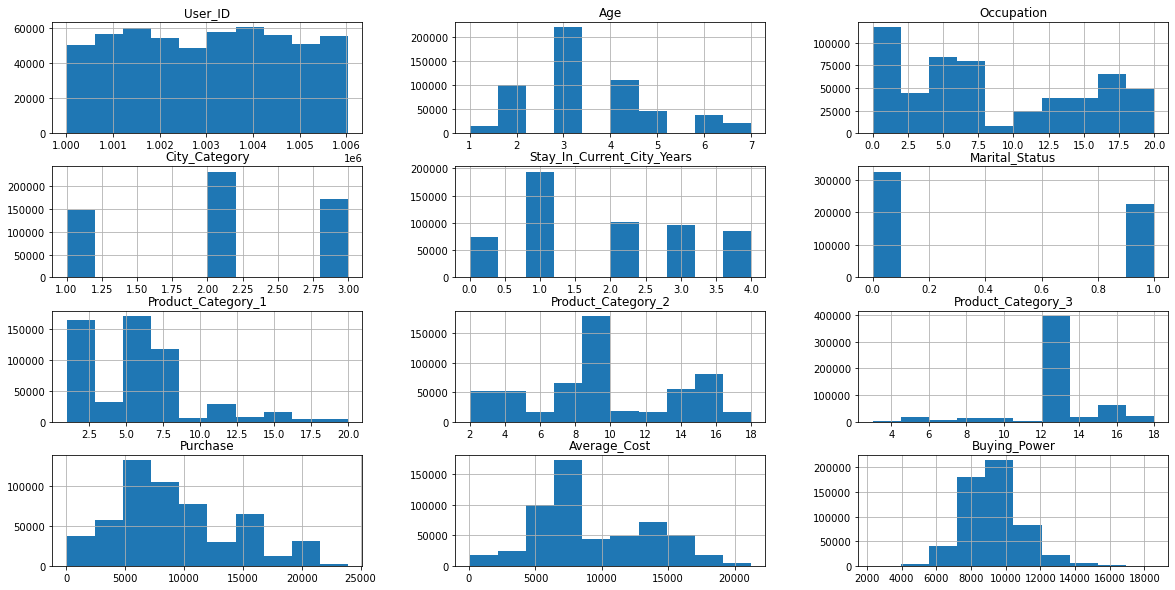

In [53]:
Final_Sales_Data.hist(figsize=(20,10))

>  Basic Data Visualization after cleaning the data and Gathering insights

In [54]:
Final_Sales_Data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Average_Cost,Buying_Power
0,1000001,P00069042,F,1,10,1,2,0,3,9,12,8370,11870.863436,9545.514286
1,1000001,P00248942,F,1,10,1,2,0,1,6,14,15200,16304.030981,9545.514286
2,1000001,P00087842,F,1,10,1,2,0,12,9,12,1422,1237.892157,9545.514286
3,1000001,P00085442,F,1,10,1,2,0,12,14,12,1057,1455.140762,9545.514286
4,1000002,P00285442,M,7,16,3,4,0,8,9,12,7969,7692.763547,10525.610390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,6,13,2,1,1,20,9,12,368,374.930705,13940.083333
550064,1006035,P00375436,F,3,1,3,3,0,20,9,12,371,374.266585,6293.717105
550065,1006036,P00375436,F,3,15,2,4,1,20,9,12,137,374.266585,8007.894942
550066,1006038,P00375436,F,7,1,3,2,0,20,9,12,365,374.266585,7502.833333


#### Refrence: https://stackoverflow.com/questions/63687789/how-do-i-create-a-pie-chart-using-categorical-data-in-matplotlib

Text(0.5, 1.0, 'Gender')

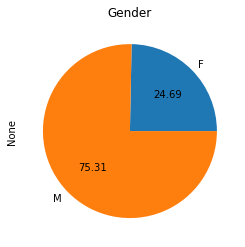

In [55]:
Final_Sales_Data.groupby('Gender').size().plot(kind='pie', autopct='%.2f')
plt.title('Gender')

> Most of the users are Males

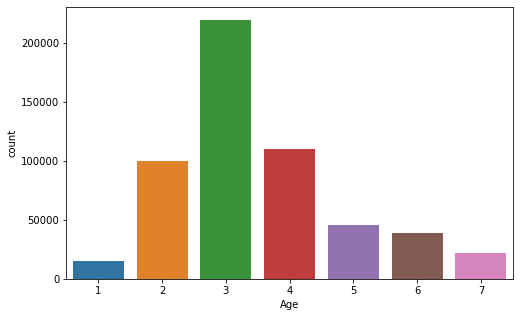

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(x='Age',data=Final_Sales_Data)
plt.show()

> Most of the users are age group of 26-35 years

Text(0.5, 1.0, 'Age')

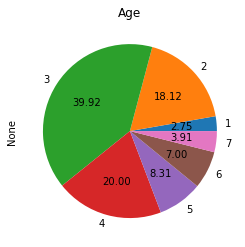

In [57]:
Final_Sales_Data.groupby('Age').size().plot(kind='pie', autopct='%.2f')
plt.title('Age')

> 40% of users are 25-36 age group

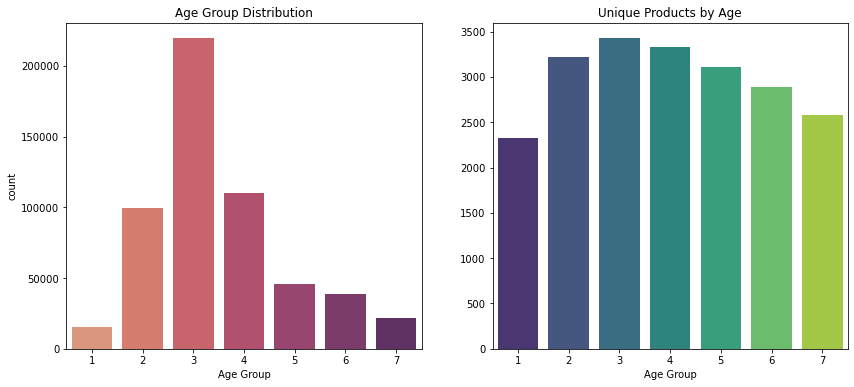

In [58]:
Product_By_Age = Final_Sales_Data.groupby('Age').nunique()['Product_ID']

fig,ax = plt.subplots(1,2,figsize=(14,6))
ax = ax.ravel()

sns.countplot(Final_Sales_Data['Age'].sort_values(),ax=ax[0], palette="flare")
ax[0].set_xlabel('Age Group')
ax[0].set_title('Age Group Distribution')
sns.barplot(x=Product_By_Age.index,y=Product_By_Age.values,ax=ax[1], palette="viridis")
ax[1].set_xlabel('Age Group')
ax[1].set_title('Unique Products by Age')

plt.show()

> Age group distribution and unique products by age

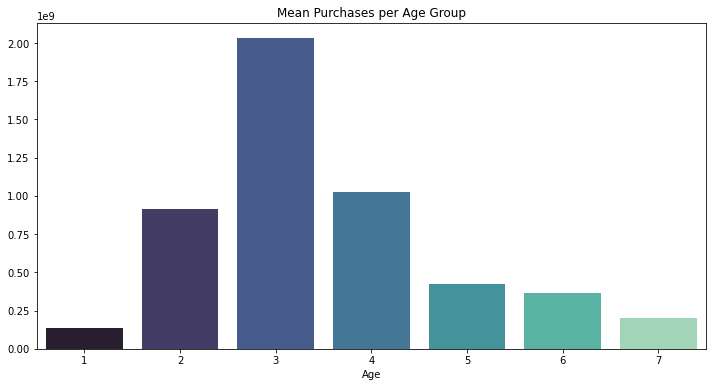

In [59]:
Spent_By_Age = Final_Sales_Data.groupby(by='Age').sum()['Purchase']
plt.figure(figsize=(12,6))

sns.barplot(x=Spent_By_Age.index,y=Spent_By_Age .values, palette="mako")
plt.title('Mean Purchases per Age Group')
plt.show()

> People spent by age on black friday sales

<AxesSubplot:xlabel='Age', ylabel='count'>

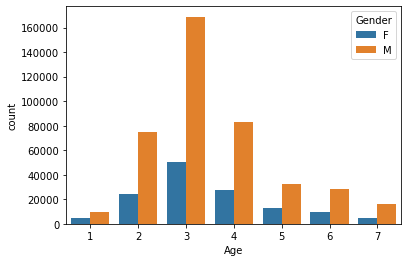

In [60]:
sns.countplot(Final_Sales_Data['Age'],hue=Final_Sales_Data['Gender'])

> Visualizing age for each gender

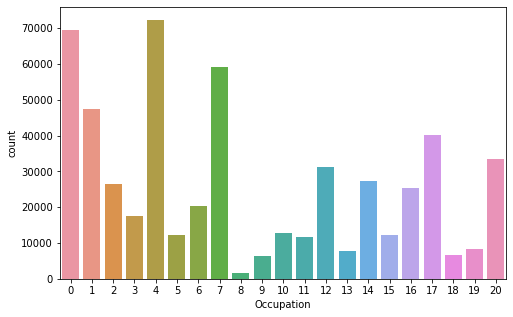

In [61]:
plt.figure(figsize=(8,5))
sns.countplot(x='Occupation',data=Final_Sales_Data)
plt.show()

<AxesSubplot:xlabel='Occupation', ylabel='Gender'>

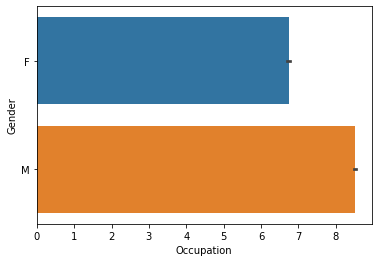

In [62]:
sns.barplot(Final_Sales_Data['Occupation'],Final_Sales_Data['Gender'])

> Occupation for each gender

<AxesSubplot:>

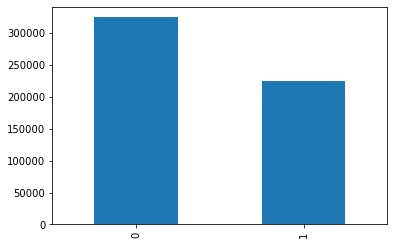

In [63]:
Final_Sales_Data.Marital_Status.value_counts().plot(kind='bar')

### Count plot showing the sales of product category 1,2 &3

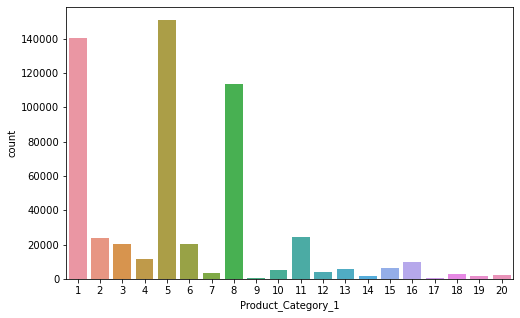

In [64]:
plt.figure(figsize=(8,5))
sns.countplot(x='Product_Category_1',data=Final_Sales_Data)
plt.show()

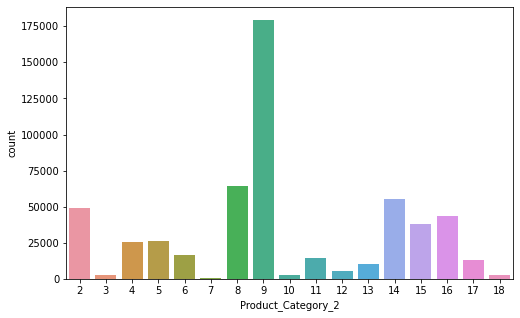

In [65]:
plt.figure(figsize=(8,5))
sns.countplot(x='Product_Category_2',data=Final_Sales_Data)
plt.show()

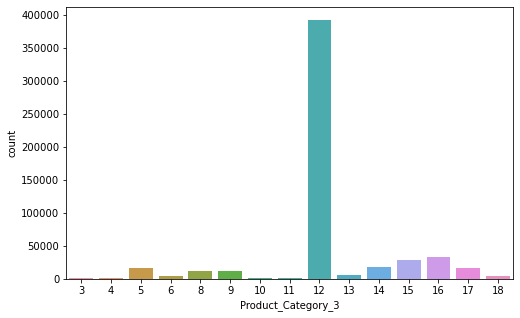

In [66]:
plt.figure(figsize=(8,5))
sns.countplot(x='Product_Category_3',data=Final_Sales_Data)
plt.show()

### Merging gender and marital status columns

In [67]:
Final_Sales_Data['Combined_G_M'] = Final_Sales_Data.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(Final_Sales_Data['Combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


In [68]:
Final_Sales_Data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Average_Cost',
       'Buying_Power', 'Combined_G_M'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='count'>

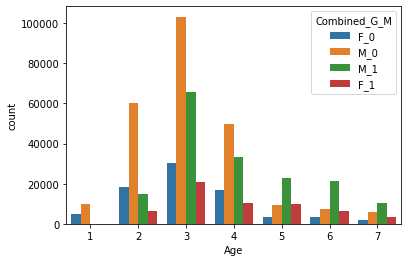

In [69]:
sns.countplot(Final_Sales_Data['Age'],hue=Final_Sales_Data['Combined_G_M'])

> Showing sales depending upon the GENDER-MARITAL_STATUS AND AGE

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

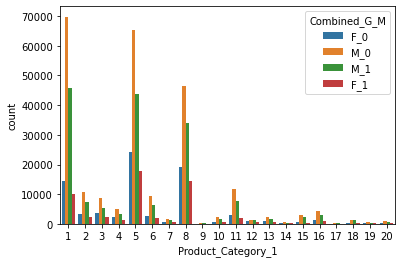

In [70]:
sns.countplot(Final_Sales_Data['Product_Category_1'],hue=Final_Sales_Data['Combined_G_M'])

> Product category 1 sales depending upon the Gender and marital_status

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

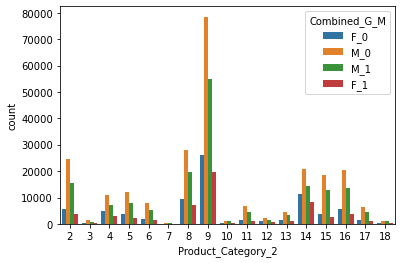

In [71]:
sns.countplot(Final_Sales_Data['Product_Category_2'],hue=Final_Sales_Data['Combined_G_M'])

> Product category 2 sales depending upon the Gender and marital_status

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

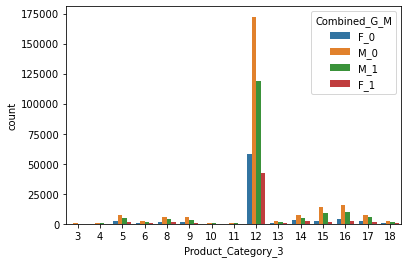

In [72]:
sns.countplot(Final_Sales_Data['Product_Category_3'],hue=Final_Sales_Data['Combined_G_M'])

> Product category 3 sales depending upon the Gender and marital_status

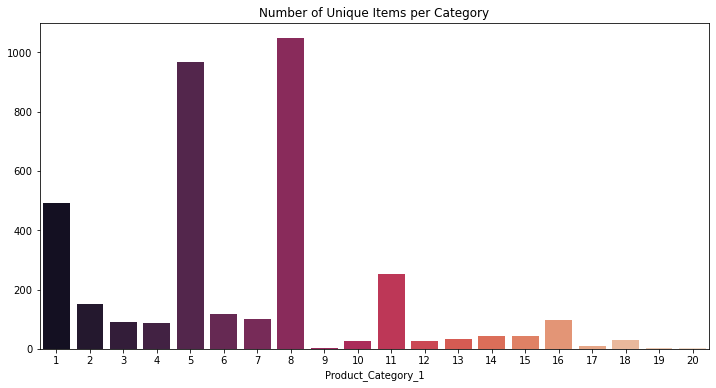

In [73]:
Product_By_Category = Final_Sales_Data.groupby('Product_Category_1')['Product_ID'].nunique()
plt.figure(figsize=(12,6))
sns.barplot(x=Product_By_Category.index,y=Product_By_Category.values, palette="rocket")
plt.title('Number of Unique Items per Category')
plt.show()

> Number of unique items per category

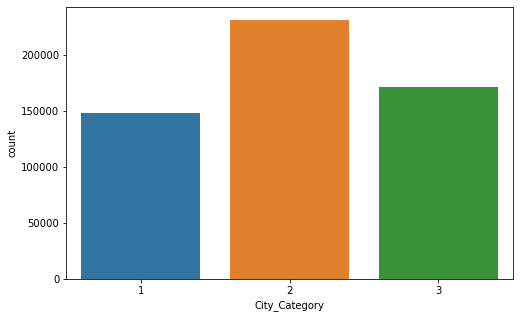

In [74]:
plt.figure(figsize=(8,5))
sns.countplot(x='City_Category',data=Final_Sales_Data)
plt.show()

> Count of cities

In [75]:
Final_Sales_Data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Average_Cost,Buying_Power,Combined_G_M
0,1000001,P00069042,F,1,10,1,2,0,3,9,12,8370,11870.863436,9545.514286,F_0
1,1000001,P00248942,F,1,10,1,2,0,1,6,14,15200,16304.030981,9545.514286,F_0
2,1000001,P00087842,F,1,10,1,2,0,12,9,12,1422,1237.892157,9545.514286,F_0
3,1000001,P00085442,F,1,10,1,2,0,12,14,12,1057,1455.140762,9545.514286,F_0
4,1000002,P00285442,M,7,16,3,4,0,8,9,12,7969,7692.763547,10525.610390,M_0


In [76]:
Final_Sales_Data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2              int64
Product_Category_3              int64
Purchase                        int64
Average_Cost                  float64
Buying_Power                  float64
Combined_G_M                   object
dtype: object

In [77]:
Final_Sales_Data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Average_Cost,Buying_Power,Combined_G_M
0,1000001,P00069042,F,1,10,1,2,0,3,9,12,8370,11870.863436,9545.514286,F_0
1,1000001,P00248942,F,1,10,1,2,0,1,6,14,15200,16304.030981,9545.514286,F_0
2,1000001,P00087842,F,1,10,1,2,0,12,9,12,1422,1237.892157,9545.514286,F_0
3,1000001,P00085442,F,1,10,1,2,0,12,14,12,1057,1455.140762,9545.514286,F_0
4,1000002,P00285442,M,7,16,3,4,0,8,9,12,7969,7692.763547,10525.610390,M_0


<AxesSubplot:>

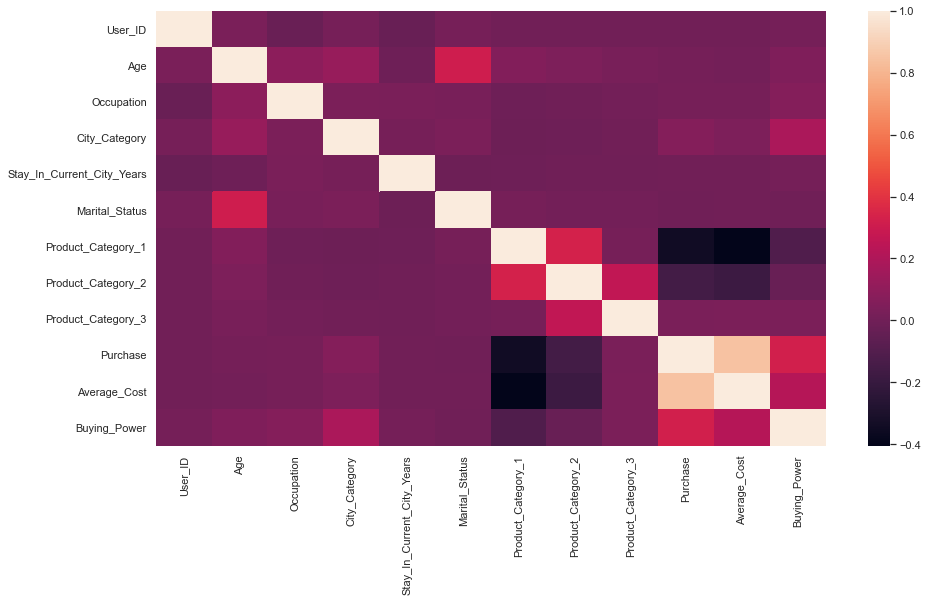

In [78]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(Final_Sales_Data.corr())

> Correlation of the whole data

### Coverting present csv file "Black_Friday_Sales.csv"

In [79]:
Final_Sales_Data.to_csv("Black_Friday_Sales.csv")

In [80]:
Sales = pd.read_csv("Black_Friday_Sales.csv")
Sales.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Average_Cost,Buying_Power,Combined_G_M
0,0,1000001,P00069042,F,1,10,1,2,0,3,9,12,8370,11870.863436,9545.514286,F_0
1,1,1000001,P00248942,F,1,10,1,2,0,1,6,14,15200,16304.030981,9545.514286,F_0
2,2,1000001,P00087842,F,1,10,1,2,0,12,9,12,1422,1237.892157,9545.514286,F_0
3,3,1000001,P00085442,F,1,10,1,2,0,12,14,12,1057,1455.140762,9545.514286,F_0
4,4,1000002,P00285442,M,7,16,3,4,0,8,9,12,7969,7692.763547,10525.610390,M_0


In [81]:
Sales.drop("Unnamed: 0",axis=1, inplace=True)

In [82]:
Sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Average_Cost,Buying_Power,Combined_G_M
0,1000001,P00069042,F,1,10,1,2,0,3,9,12,8370,11870.863436,9545.514286,F_0
1,1000001,P00248942,F,1,10,1,2,0,1,6,14,15200,16304.030981,9545.514286,F_0
2,1000001,P00087842,F,1,10,1,2,0,12,9,12,1422,1237.892157,9545.514286,F_0
3,1000001,P00085442,F,1,10,1,2,0,12,14,12,1057,1455.140762,9545.514286,F_0
4,1000002,P00285442,M,7,16,3,4,0,8,9,12,7969,7692.763547,10525.610390,M_0


In [83]:
Sales.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2              int64
Product_Category_3              int64
Purchase                        int64
Average_Cost                  float64
Buying_Power                  float64
Combined_G_M                   object
dtype: object

#### Reference: https://github.com/soumilshah1995/CSVtoMongoDB/blob/master/test.py

### Connection of jupyter notebook to mongo-database using pymongo

In [84]:
import pymongo
from pymongo import MongoClient
import json

In [85]:
try:
    import pymongo
    from pymongo import MongoClient
    import json
except Exception as e:
    print("Some Modules are Missing ")

class MongoDB(object):

    def __init__(self, dBName=None, collectionName=None):

        self.dBName = dBName
        self.collectionName = collectionName

        self.client = MongoClient("localhost", 27017, maxPoolSize=50)

        self.DB = self.client[self.dBName]
        self.collection = self.DB[self.collectionName]



    def InsertData(self, path=None):
        """
        :param path: Path os csv File
        :return: None
        """

        df = pd.read_csv(path)
        data = df.to_dict('records')

        self.collection.insert_many(data, ordered=False)
        print("All the Data has been Exported to Mongo DB Server .... ")

if __name__ == "__main__":
    mongodb = MongoDB(dBName = 'Friday_Sales', collectionName='Sales_Data')
    mongodb.InsertData(path="Black_Friday_Sales.csv")

All the Data has been Exported to Mongo DB Server .... 


### Connection from mongo to python using pyspark

In [86]:
import pyspark
from pyspark import SparkContext 
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

In [87]:
print(pyspark.__version__)

3.2.1


In [88]:
conf = pyspark.SparkConf().set("spark.jars.packages",
                              "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1").setMaster("local").setAppName("My App").setAll([("spark.driver.memory", "50g"), ("spark.executor.memory", "70g")])

In [89]:
sc = SparkContext(conf=conf)

In [90]:
sqlC = SQLContext(sc)

In [91]:
mongo_ip = "mongodb://localhost:27017/Friday_Sales."

In [92]:
print(mongo_ip)

mongodb://localhost:27017/Friday_Sales.


In [93]:
Sales = sqlC.read.format("com.mongodb.spark.sql.DefaultSource").option("uri", mongo_ip + "Sales_Data").load()

In [94]:
Sales.createOrReplaceTempView("Sales")

In [95]:
Sales = sqlC.sql("SELECT *FROM Sales")

In [96]:
Sales.show()

+---+------------------+------------------+-------------+------------+------+--------------+----------+------------------+------------------+------------------+----------+--------+--------------------------+----------+-------+--------------------+
|Age|      Average_Cost|      Buying_Power|City_Category|Combined_G_M|Gender|Marital_Status|Occupation|Product_Category_1|Product_Category_2|Product_Category_3|Product_ID|Purchase|Stay_In_Current_City_Years|Unnamed: 0|User_ID|                 _id|
+---+------------------+------------------+-------------+------------+------+--------------+----------+------------------+------------------+------------------+----------+--------+--------------------------+----------+-------+--------------------+
|  1|11870.863436123347| 9545.514285714286|            1|         F_0|     F|             0|        10|                 3|                 9|                12| P00069042|    8370|                         2|         0|1000001|{6281b670e547fcb8...|
|  1|163

In [97]:
Sales.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Average_Cost: double (nullable = true)
 |-- Buying_Power: double (nullable = true)
 |-- City_Category: integer (nullable = true)
 |-- Combined_G_M: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Marital_Status: integer (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- Product_Category_1: integer (nullable = true)
 |-- Product_Category_2: integer (nullable = true)
 |-- Product_Category_3: integer (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Purchase: integer (nullable = true)
 |-- Stay_In_Current_City_Years: integer (nullable = true)
 |-- Unnamed: 0: integer (nullable = true)
 |-- User_ID: integer (nullable = true)
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)



#### Reference: https://www.youtube.com/watch?v=Rz-u0RExZtg&t=173s

In [98]:
Sales.show(5)

+---+------------------+-----------------+-------------+------------+------+--------------+----------+------------------+------------------+------------------+----------+--------+--------------------------+----------+-------+--------------------+
|Age|      Average_Cost|     Buying_Power|City_Category|Combined_G_M|Gender|Marital_Status|Occupation|Product_Category_1|Product_Category_2|Product_Category_3|Product_ID|Purchase|Stay_In_Current_City_Years|Unnamed: 0|User_ID|                 _id|
+---+------------------+-----------------+-------------+------------+------+--------------+----------+------------------+------------------+------------------+----------+--------+--------------------------+----------+-------+--------------------+
|  1|11870.863436123347|9545.514285714286|            1|         F_0|     F|             0|        10|                 3|                 9|                12| P00069042|    8370|                         2|         0|1000001|{6281b670e547fcb8...|
|  1|16304.0

In [99]:
Sales.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Average_Cost: double (nullable = true)
 |-- Buying_Power: double (nullable = true)
 |-- City_Category: integer (nullable = true)
 |-- Combined_G_M: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Marital_Status: integer (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- Product_Category_1: integer (nullable = true)
 |-- Product_Category_2: integer (nullable = true)
 |-- Product_Category_3: integer (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Purchase: integer (nullable = true)
 |-- Stay_In_Current_City_Years: integer (nullable = true)
 |-- Unnamed: 0: integer (nullable = true)
 |-- User_ID: integer (nullable = true)
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)



In [100]:
Sales = Sales.drop("Combined_G_M","_c0","User_ID","Product_ID", 'Average_Cost', 'Buying_Power','Unnamed: 0','_id')

> Dropping columns not necessary for modeling

In [101]:
Sales.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- City_Category: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Marital_Status: integer (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- Product_Category_1: integer (nullable = true)
 |-- Product_Category_2: integer (nullable = true)
 |-- Product_Category_3: integer (nullable = true)
 |-- Purchase: integer (nullable = true)
 |-- Stay_In_Current_City_Years: integer (nullable = true)



In [102]:
Sales.show(5)

+---+-------------+------+--------------+----------+------------------+------------------+------------------+--------+--------------------------+
|Age|City_Category|Gender|Marital_Status|Occupation|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|Stay_In_Current_City_Years|
+---+-------------+------+--------------+----------+------------------+------------------+------------------+--------+--------------------------+
|  1|            1|     F|             0|        10|                 3|                 9|                12|    8370|                         2|
|  1|            1|     F|             0|        10|                 1|                 6|                14|   15200|                         2|
|  1|            1|     F|             0|        10|                12|                 9|                12|    1422|                         2|
|  1|            1|     F|             0|        10|                12|                14|                12|    1057|      

## Splitting data into two new data's

In [103]:
new_data_1, new_data_2 = Sales.randomSplit([0.6, 0.4], seed = 2018)

In [104]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer

indexers = StringIndexer(inputCol='Gender', outputCol="Gender_index")
indexed = indexers.fit(new_data_2).transform(new_data_2)
indexed.columns


['Age',
 'City_Category',
 'Gender',
 'Marital_Status',
 'Occupation',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase',
 'Stay_In_Current_City_Years',
 'Gender_index']

In [105]:
Sales_r = indexed.drop('Gender')

In [106]:
Sales_r.show(5)

+---+-------------+--------------+----------+------------------+------------------+------------------+--------+--------------------------+------------+
|Age|City_Category|Marital_Status|Occupation|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|Stay_In_Current_City_Years|Gender_index|
+---+-------------+--------------+----------+------------------+------------------+------------------+--------+--------------------------+------------+
|  1|            1|             0|         0|                 8|                 9|                12|    9835|                         2|         1.0|
|  1|            1|             0|        10|                 1|                 2|                12|   15289|                         1|         1.0|
|  1|            1|             0|        10|                 1|                 2|                15|   15890|                         3|         1.0|
|  1|            1|             0|        10|                 1|                 5|     

In [107]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

#creating vectors from features
#Apache MLlib takes input if vector form

assembler=VectorAssembler(inputCols=[ 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Gender_index'],outputCol='features')
output=assembler.transform(indexed)
output.select('features','Purchase').show(5)
#output as below

+--------------------+--------+
|            features|Purchase|
+--------------------+--------+
|[1.0,0.0,1.0,2.0,...|    9835|
|[1.0,10.0,1.0,1.0...|   15289|
|[1.0,10.0,1.0,3.0...|   15890|
|[1.0,10.0,1.0,3.0...|   15658|
|[1.0,10.0,1.0,1.0...|   19471|
+--------------------+--------+
only showing top 5 rows



> VectorAssembler is a transformer that combines a given list of columns into a single vector column.

In [108]:
final_data=output.select('features','Purchase')

train_data,test_data=final_data.randomSplit([0.8,0.2])


> Random split of the data into train and test

### Linear Regression

In [109]:
#import LinearRegression library
from pyspark.ml.regression import LinearRegression

#creating an object of class LinearRegression
#object takes features and label as input arguments
Sales_lr=LinearRegression(featuresCol='features',labelCol='Purchase')

#pass train_data to train model
trained_sale_model=Sales_lr.fit(train_data)

#evaluating model trained for Rsquared error
sale_results=trained_sale_model.evaluate(train_data)
  
print('Rsquared Error :',sale_results.r2)

Rsquared Error : 0.1284127518997259


> If we observe the score of the linear regression, it performs very poor on this data set as it has only 12% of accuracy

In [110]:
#testing Model on unlabeled data
#create unlabeled data from test_data
#testing model on unlabeled data
unlabeled_data=test_data.select('features')
unlabeled_data.show(5)

+--------------------+
|            features|
+--------------------+
|[1.0,10.0,3.0,1.0...|
|[1.0,10.0,3.0,1.0...|
|[2.0,0.0,1.0,0.0,...|
|[2.0,1.0,2.0,2.0,...|
|[2.0,2.0,2.0,3.0,...|
+--------------------+
only showing top 5 rows



In [111]:
predictions=trained_sale_model.transform(unlabeled_data)
predictions.show()
#below are the results of output from test data

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[1.0,0.0,2.0,2.0,...| 9200.958223160998|
|[1.0,0.0,2.0,3.0,...|11695.570736589829|
|[1.0,10.0,1.0,0.0...| 8090.713458047721|
|[1.0,10.0,1.0,2.0...|5219.2131826775785|
|[1.0,10.0,1.0,3.0...|10317.544386500782|
|[1.0,10.0,1.0,3.0...| 10037.88689884714|
|[1.0,10.0,1.0,3.0...| 8866.958735617125|
|[1.0,10.0,1.0,3.0...|10121.981302725584|
|[1.0,10.0,1.0,3.0...|  8079.41209290963|
|[1.0,10.0,1.0,3.0...| 8004.214558492504|
|[1.0,10.0,2.0,1.0...| 11582.14704531738|
|[1.0,10.0,2.0,1.0...|10458.109400939908|
|[1.0,10.0,2.0,3.0...|10680.093132645314|
|[1.0,10.0,2.0,3.0...|5465.7215683349605|
|[1.0,10.0,3.0,0.0...|10573.774643651475|
|[1.0,10.0,3.0,0.0...|10808.264116364171|
|[1.0,10.0,3.0,0.0...|10323.928577383509|
|[1.0,10.0,3.0,0.0...| 9614.000435151469|
|[1.0,10.0,3.0,0.0...| 9614.000435151469|
|[1.0,10.0,3.0,0.0...| 8386.586421460861|
+--------------------+------------

> Predictions of unlabeled data

### Decision Tree Regression

In [123]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

#creating an object of class LinearRegression
#object takes features and label as input arguments

test_dt=DecisionTreeRegressor(featuresCol='features',labelCol='Purchase')

In [129]:
test_b = test_data.select('features', test_data.Purchase.alias('label'))

In [126]:
#pass train_data to train model
dt_model=test_dt.fit(train_data)

In [131]:
test_dt_t = dt_model.transform(test_b)

In [132]:
evaluator = RegressionEvaluator()
print(evaluator.evaluate(test_dt_t,
{evaluator.metricName: "r2"})
)

0.5776606902181751


> If we observe decision tree accuracy score, the score is about 60% where it performs better than the linear regression on this data.

### Summary

As per my scores I can say that "Decision Tree Regression" works well for my data as it has 60% o accuracy towards my data.
- Linear Regression: 12%
- Decision Tree Regression: 60%

### References
- https://www.kaggle.com/code/kuchhbhi/black-friday-eda-and-feature-transformation
- https://github.com/nanthasnk/Black-Friday-Sales-Prediction/blob/master/Black%20Friday%20Sales%20Prediction.ipynb
- https://medium.com/analytics-vidhya/sales-prediction-on-black-friday-using-ml-regression-technique-380af62c181e
- https://www.geeksforgeeks.org/pyspark-linear-regression-using-apache-mllib/
- https://medium.com/analytics-vidhya/linear-regression-and-decision-tree-implementation-using-pyspark-bfcd93dee86